# Homework 5

October 13, 2020

In [2]:
datadir = 'data_files/'

##### (1) The National Merit people have collected data on the intellectual performance of twins on several different aptitudes. The twins are either identical or fraternal. Are twins significantly related to one another on math performance? Does zygosity affect that relationship? This problem involves some moderately tricky file manipulation. If you struggle with that aspect of the problem, contact me and show me where you’re at and I’ll offer some hints or guidance. (data in minnesota_twins.csv)

(The coding key is-- with zygosity, 1 = identical; sex, 1 = male; moed = mother's education level; faed = father's ed level; and faminc = family income. These variables were all based on likert type scales with higher numbers indicating more. The remaining variables are all numeric test scores on different categories.)

In [28]:
twins = read.csv(file.path(datadir,'/minnesota_twins.csv'))

In [29]:
head(twins)

pairnum,sex,zygosity,moed,faed,faminc,english,math,socsci,natsci,vocab
1,2,1,3,4,2,14,13,17,18,14
1,2,1,3,4,2,11,14,15,10,12
4,2,1,1,1,1,20,20,16,16,13
4,2,1,1,1,1,17,19,13,13,14
5,2,1,1,1,1,11,8,15,16,12
5,2,1,1,1,1,16,13,13,8,15


In [44]:
# add a within pair twin identifier
twins$pair_id = rep(c(0,1), dim(twins)[1]/2)

#keep only relevent vars
col_keep = c("pairnum", "pair_id", "zygosity", "math")
twins = twins[col_keep]
dim(twins)
head(twins)

[1] 1678    4

pairnum,pair_id,zygosity,math
1,0,1,13
1,1,1,14
4,0,1,20
4,1,1,19
5,0,1,8
5,1,1,13


In [103]:
# get difference in math scores between each pair of twins
df.wide <- reshape(twins, direction='wide', idvar='pairnum', timevar='pair_id')
df.wide$math_diff = abs(df.wide$math.0 - df.wide$math.1)
df.wide['rowmax'] = rowmax = ifelse(df.wide$math.0 > df.wide$math.1, df.wide$math.0, df.wide$math.1)
df.wide['rowmin'] = rowmax = ifelse(df.wide$math.0 < df.wide$math.1, df.wide$math.0, df.wide$math.1)

#transform(df.wide, rowmax = ifelse(math.0 > math.1, math.0, math.1))
#transform(df.wide, rowmin = ifelse(math.0 > math.1, math.1, math.0))
#dim(df.wide)
head(df.wide)


,pairnum,zygosity.0,math.0,zygosity.1,math.1,math_diff,rowmax,rowmin
1,1,1,13,1,14,1,14,13
3,4,1,20,1,19,1,20,19
5,5,1,8,1,13,5,13,8
7,7,2,19,2,16,3,19,16
9,10,2,23,2,13,10,23,13
11,11,2,17,2,18,1,18,17


In [104]:
t.test(df.wide$rowmax, df.wide$rowmin, paired= TRUE, alternative="two.sided")


	Paired t-test

data:  df.wide$rowmax and df.wide$rowmin
t = 33.429, df = 838, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3.786457 4.258835
sample estimates:
mean of the differences 
               4.022646 


In [55]:
t.test(df.wide$math_diff, mu=0)


	One Sample t-test

data:  df.wide$math_diff
t = 33.429, df = 838, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.786457 4.258835
sample estimates:
mean of x 
 4.022646 


In [114]:
diff_model = lm(df.wide$math_diff ~ 1)
summary(diff_model)


Call:
lm(formula = df.wide$math_diff ~ 1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.023 -3.023 -1.023  1.977 17.977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.0226     0.1203   33.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.485 on 838 degrees of freedom


(a) From these data, I calculated the mean difference in math scores within each pair of twins. I used a t-test to test the alternative hypothesis that this mean is different from 0. The t statistic is 33.43 with a p-value of 2.2e-16, so I fail to accept the null hypothesis that the differences in math scores between twins is unrelated.

In [109]:
#use linear model to determine if zygosity affects relationship
#same linear model as above, but with zygosity as a predictor
diff_model_zyg = lm(math_diff ~ zygosity.0, df.wide)
summary(diff_model_zyg)


Call:
lm(formula = math_diff ~ zygosity.0, data = df.wide)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9545 -2.4185 -0.9545  1.5815 17.0455 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8824     0.3554   5.297 1.51e-07 ***
zygosity.0    1.5361     0.2407   6.382 2.90e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.406 on 837 degrees of freedom
Multiple R-squared:  0.0464,	Adjusted R-squared:  0.04526 
F-statistic: 40.73 on 1 and 837 DF,  p-value: 2.896e-10


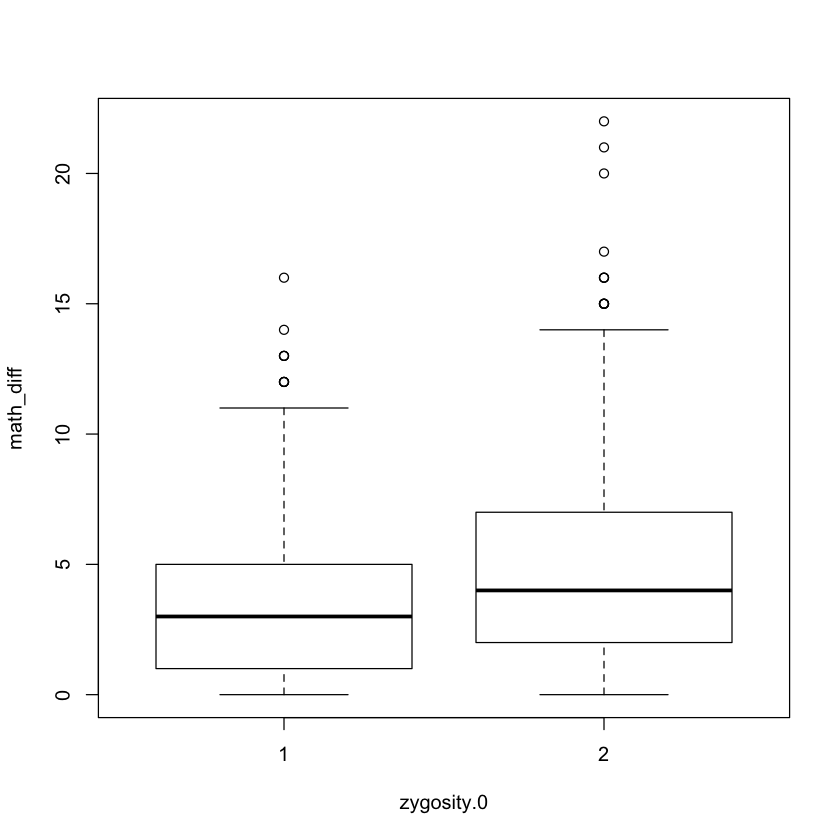

In [110]:
boxplot(math_diff ~ zygosity.0, df.wide)

(b) When I enter zygosity into the linear model, the beta for the intercept goes from 4.0 to 1.9, but for zygosity itself, the beta is 1.5 with a p-value of 2.9e-10, so it is highly significant. At the same time the adjusted R2 for this model is 0.045, so even though zygosity does significantly affect the difference in math scores, it explains very little variance in these scores between pairs of twins. This corresponds to the discrepancy seen in a boxplot of the differences between twins when stratified by zygosity. Therefore I fail to accept the null hypothesis that zygosity does not affect the relationship between twins and math scores.

##### (2) I have an old database of bank salaries. Are women paid significantly less at the beginning (salbeg)? Please only consider education level (edlevel) and age as confounding variables. (data in bank_salaries.csv)

(coding: sex, 0 = male, edlevel -- # years (so 12 = High school diploma, etc.)

In [4]:
bank = read.csv(file.path(datadir,'bank_salaries.csv'))
head(bank)

id,salbeg,sex,time,age,edlevel,work,minority
628,8400,0,81,28.50,16,0.25,0
630,24000,0,73,40.33,16,12.50,0
632,10200,0,83,31.08,15,4.08,0
633,8700,0,93,31.17,16,1.83,0
635,17400,0,83,41.92,19,13.00,0
637,12996,0,80,29.50,18,2.42,0


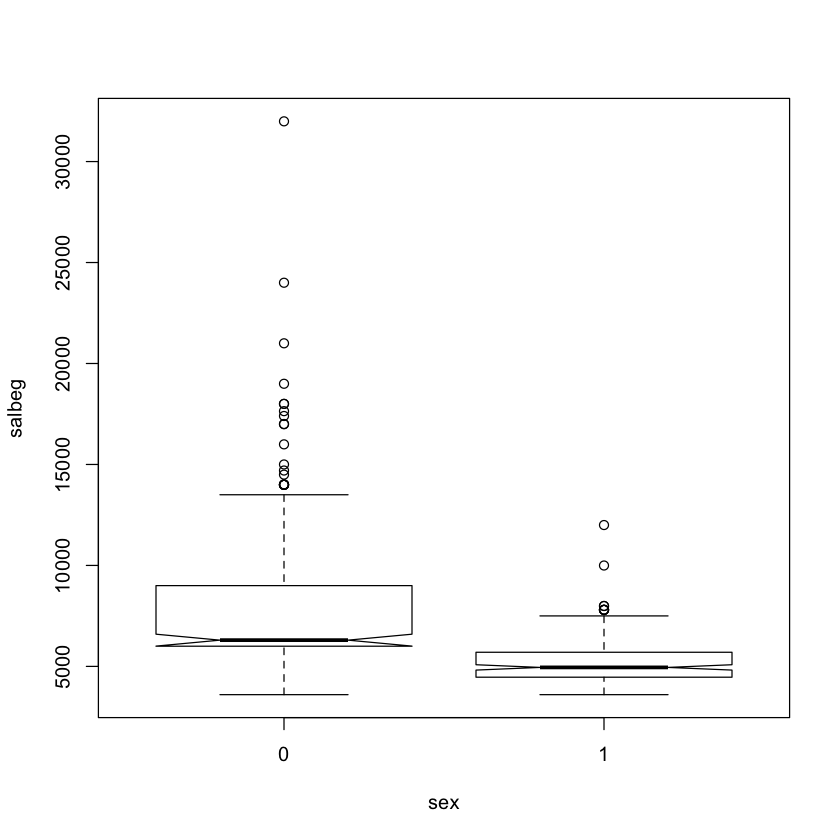

In [7]:
# plot salbeg by sex
boxplot(salbeg ~ sex, notch=TRUE, bank)

From the boxplot, it looks like there is strong evidence that the median starting salary for men and women is different. 

In [10]:
#t-test of the 2 means (men and women), not controlling for edlevel and age
t.test(salbeg ~ sex, bank)



	Welch Two Sample t-test

data:  salbeg by sex
t = 11.987, df = 318.82, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2410.475 3357.067
sample estimates:
mean in group 0 mean in group 1 
       8120.558        5236.787 


The t-test of the difference in means of beginning salary for men and women suggests that these means are statistically different with p = 2.2e-16.

In [11]:
# first create interaction terms
int_sex_edlevel = scale(bank$sex) * scale(bank$edlevel)
int_sex_age = scale(bank$sex) * scale(bank$age)

# create linear model and control for sex
lm_salbeg = lm(salbeg ~ age + edlevel + sex + int_sex_edlevel + int_sex_age, bank)
summary(lm_salbeg)


Call:
lm(formula = salbeg ~ age + edlevel + sex + int_sex_edlevel + 
    int_sex_age, data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-5292.4 -1170.6  -244.0   803.4 18602.3 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2712.48     734.48  -3.693 0.000248 ***
age                57.31       9.10   6.298 6.95e-10 ***
edlevel           588.49      38.77  15.180  < 2e-16 ***
sex             -1845.07     211.21  -8.736  < 2e-16 ***
int_sex_edlevel  -892.25     114.23  -7.811 3.77e-14 ***
int_sex_age      -543.21     104.30  -5.208 2.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2110 on 468 degrees of freedom
Multiple R-squared:  0.5554,	Adjusted R-squared:  0.5507 
F-statistic: 116.9 on 5 and 468 DF,  p-value: < 2.2e-16


This model shows that both interaction terms, sex with education level and sex with age, are highly significant. It therefore appears that sex is a moderator of beginning salary. In other words, women are paid significantly less than men at the beginning than men in this data set, when considering age and education level as confounders.